In [1]:
from astropy.io import fits
import numpy as np
import healpy as hp
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
quasar_n = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSS16Q/eBOSS_QSO_clustering_data-NGC-vDR16.fits')
quasar_s = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSS16Q/eBOSS_QSO_clustering_data-SGC-vDR16.fits')
quasar_full = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSS16Q/eBOSS_QSO_full_ALLdata-vDR16.fits')

quasar_all = np.hstack((quasar_n, quasar_s))

In [3]:
random_n = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSS16Q/eBOSS_QSO_clustering_random-NGC-vDR16.fits')
random_s = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSS16Q/eBOSS_QSO_clustering_random-SGC-vDR16.fits')
random_all = np.hstack((random_n, random_s))

In [4]:
quasar_cata = np.zeros(len(quasar_all), dtype=[('ra', 'f8'), ('dec', 'f8'), ('z', 'f8'), ('w', 'f8')])
quasar_cata['ra'] = quasar_all['RA']
quasar_cata['dec'] = quasar_all['DEC']
quasar_cata['z'] = quasar_all['Z']
# quasar_cata['w'] = quasar['WEIGHT_SYSTOT']*(quasar['WEIGHT_NOZ'] + quasar['WEIGHT_CP'] - 1)
quasar_cata['w'] = quasar_all['WEIGHT_SYSTOT']*quasar_all['WEIGHT_NOZ']*quasar_all['WEIGHT_FKP']
np.save(f'../catalogue/quasar_lss_nocp', quasar_cata)

In [3]:
quasar_cata = np.zeros(len(quasar_all), dtype=[('ra', 'f8'), ('dec', 'f8'), ('z', 'f8'), ('w', 'f8')])
quasar_cata['ra'] = quasar_all['RA']
quasar_cata['dec'] = quasar_all['DEC']
quasar_cata['z'] = quasar_all['Z']
# quasar_cata['w'] = quasar['WEIGHT_SYSTOT']*(quasar['WEIGHT_NOZ'] + quasar['WEIGHT_CP'] - 1)
quasar_cata['w'] = quasar_all['WEIGHT_SYSTOT']*quasar_all['WEIGHT_NOZ']*quasar_all['WEIGHT_CP']*quasar_all['WEIGHT_FKP']
# np.save(f'../catalogue/quasar_lss_all', quasar_cata)

In [ ]:
random = random_all[np.random.choice(len(random_all), len(quasar_all)*20, replace=False)]
random_cata = np.zeros(len(random), dtype=[('ra', 'f8'), ('dec', 'f8'), ('z', 'f8'), ('w', 'f8')])
random_cata['ra'] = random['RA']
random_cata['dec'] = random['DEC']
random_cata['z'] = random['Z']
random_cata['w'] = random['WEIGHT_FKP']
# np.save(f'../catalogue/random_quasar_lss_all', random_cata)

In [5]:
random = random_all[np.random.choice(len(random_all), len(quasar_all)*20, replace=False)]
random_cata = np.zeros(len(random), dtype=[('ra', 'f8'), ('dec', 'f8'), ('z', 'f8'), ('w', 'f8')])
random_cata['ra'] = random['RA']
random_cata['dec'] = random['DEC']
random_cata['z'] = random['Z']
random_cata['w'] = random['WEIGHT_SYSTOT']*random['WEIGHT_NOZ']*random['WEIGHT_CP']
np.save(f'../catalogue/random_quasar_lss_w', random_cata)

Plot quasar distribution

In [4]:
import astropy.units as u
import astropy.coordinates as coo

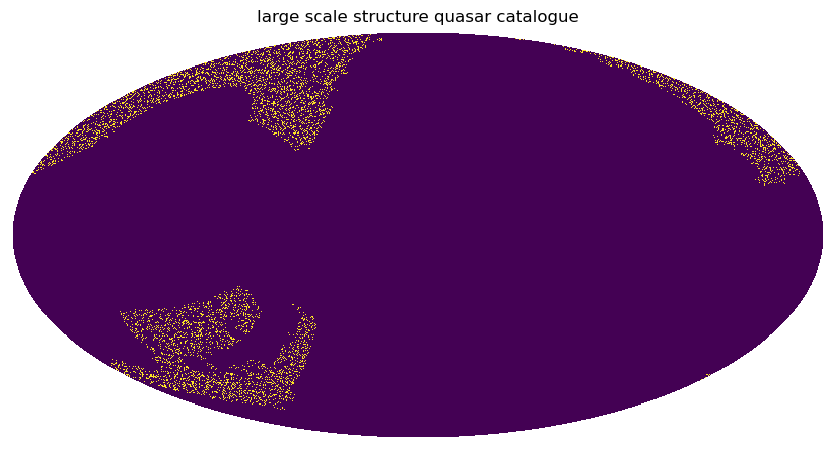

In [5]:
image = np.zeros(hp.nside2npix(1024))
c = coo.SkyCoord(ra=quasar_cata['ra'], dec=quasar_cata['dec'], unit='deg')
l = c.galactic.l.to('rad').value
b = c.galactic.b.to('rad').value

image[hp.ang2pix(1024, np.pi / 2 - b, l)] = 1
# image[hp.ang2pix(1024, np.deg2rad(90-quasar_cata['dec']), np.deg2rad(quasar_cata['ra']))] = 1
hp.mollview(image, title='large scale structure quasar catalogue', cbar=False)
# plt.savefig('./fig/lss')

In [57]:
c_plot = c[np.random.choice(len(c), 3000)]

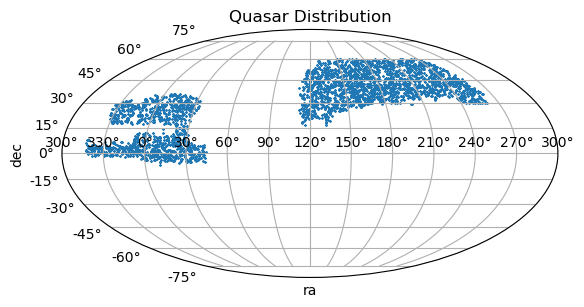

In [61]:
fig = plt.figure()
axe = fig.add_subplot(111, projection='mollweide')
axe.grid(True)
central_longitude = 120
axe.scatter((c_plot.ra - central_longitude*u.deg).wrap_at('180d').radian, c_plot.dec.radian, s=1, marker='*')
xticks = np.arange(-180, 181, 30)  # 每30度一个刻度
# xticks = (xticks + 180) % 360 - 180
axe.set_xticks(np.radians(xticks))  # 调整刻度位置
f = lambda x: x % 360
axe.set_xticklabels([f"{f(x+central_longitude)}°" for x in xticks])
axe.set_xlabel('ra')
axe.set_ylabel('dec')
axe.set_title('Quasar Distribution')
plt.show()

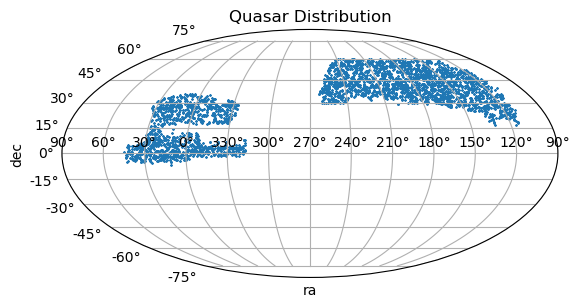

In [65]:
fig = plt.figure()
axe = fig.add_subplot(111, projection='mollweide')
axe.grid(True)
central_longitude = -90
axe.scatter((-c_plot.ra + central_longitude*u.deg).wrap_at('180d').radian, c_plot.dec.radian, s=1, marker='*')
xticks = np.arange(-180, 181, 30)  # 每30度一个刻度
# xticks = (xticks + 180) % 360 - 180
axe.set_xticks(np.radians(xticks))  # 调整刻度位置
f = lambda x: (-x) % 360
axe.set_xticklabels([f"{f(x-central_longitude)}°" for x in xticks])
axe.set_xlabel('ra')
axe.set_ylabel('dec')
axe.set_title('Quasar Distribution')
plt.show()

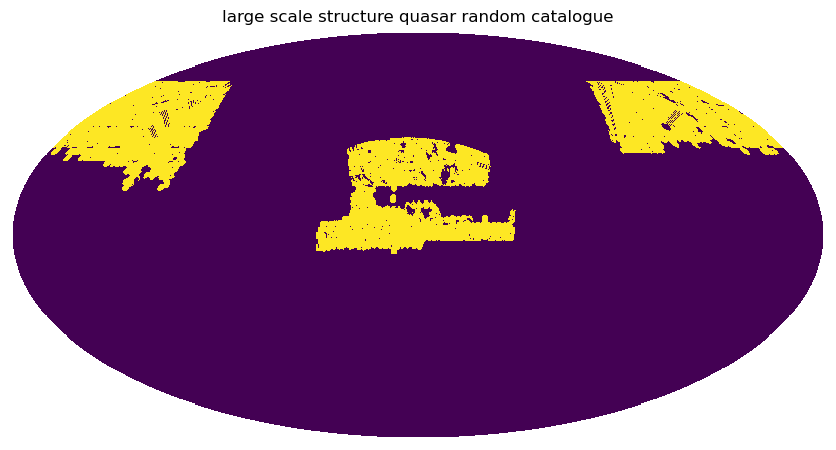

In [25]:
image = np.zeros(hp.nside2npix(1024))
image[hp.ang2pix(1024, np.deg2rad(90-random_cata['dec']), np.deg2rad(random_cata['ra']))] = 1
hp.mollview(image, title='large scale structure quasar random catalogue', cbar=False)

Try matching

quasar lss catalogue has QSO ID, which can be matched to quasar lss full data file.
We can also consider matching th position to SDSS 16Q quasar, which has absolute magenitude.

In [3]:
quasar_SDSS = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSS16Q/DR16Q_v4.fits')

In [90]:
id_to_index = {id_: i for i, id_ in enumerate(quasar_full['QSO_ID'])}
index = np.zeros(len(quasar_all), int)
for i in range(len(quasar_all)):
    index[i] = id_to_index[quasar_all['QSO_ID'][i]]
matched_full = quasar_full[index]

In [91]:
id_to_index = {id_: i for i, id_ in enumerate(quasar_SDSS['OBJID'])}
index = np.zeros(len(matched_full), int)
OBJID = matched_full['OBJID_TARGETING'].astype('<U19')
for i in range(len(matched_full)):
    index[i] = id_to_index.get(OBJID[i], -1)
valid = index != -1
matched_SDSS = quasar_SDSS[index]

In [92]:
M_I = matched_SDSS['M_I'].astype(float)
M_I[~valid] = np.nan

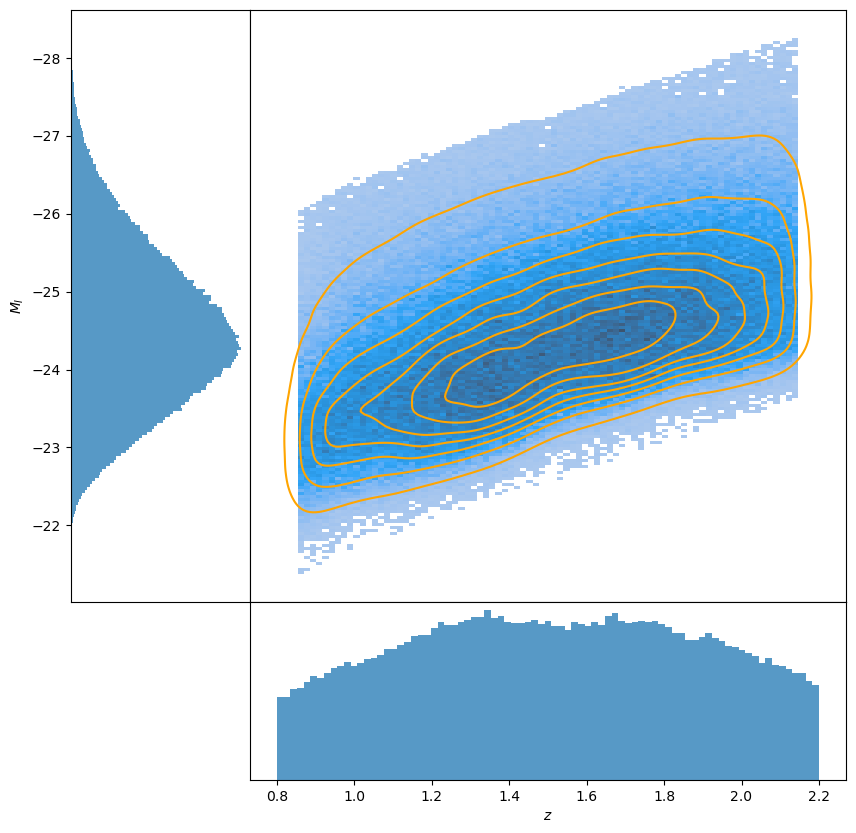

In [17]:
fig, axes = plt.subplots(2, 2, sharex=False, sharey=False, width_ratios=[0.3, 1], height_ratios=[1, 0.3], figsize=(10, 10))
z = quasar_all['Z'].astype(float)
data = {'Z': z, 'M_I': M_I}
axes[0,0].invert_yaxis()
axes[0,1].invert_yaxis()
sns.histplot(data, x='Z', y='M_I', ax=axes[0,1])
sns.kdeplot(data, x='Z', y='M_I', ax=axes[0,1], color='orange', levels=8)
sns.histplot(data, y='M_I', ax=axes[0,0], linewidth=0)
sns.histplot(data, x='Z', ax=axes[1,1], linewidth=0)

axes[0,0].set_ylabel('$M_I$')
axes[1,1].set_xlabel('$z$')

axes[0,1].set_xticks([])
axes[0,1].set_yticks([])
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('')

axes[0,0].set_xticks([])
axes[0,0].set_xlabel('')

axes[1,1].set_yticks([])
axes[1,1].set_ylabel('')

axes[1,0].set_axis_off()
fig.subplots_adjust(wspace=0, hspace=0)


In [ ]:

axes[1,0].set_axis_off()
# fig.set_tight_layout()
plt.tight_layout()

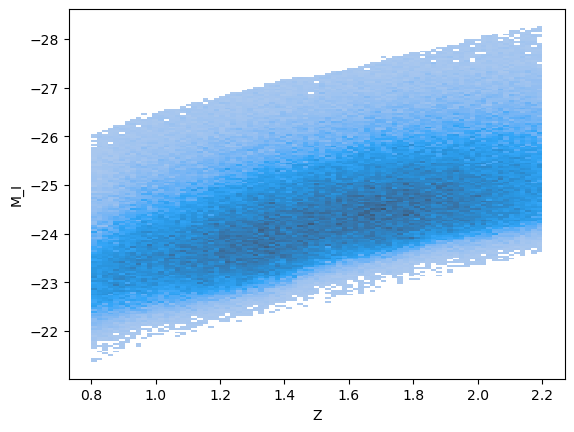

In [17]:
plt.gca().invert_yaxis()

<Axes: ylabel='Count'>

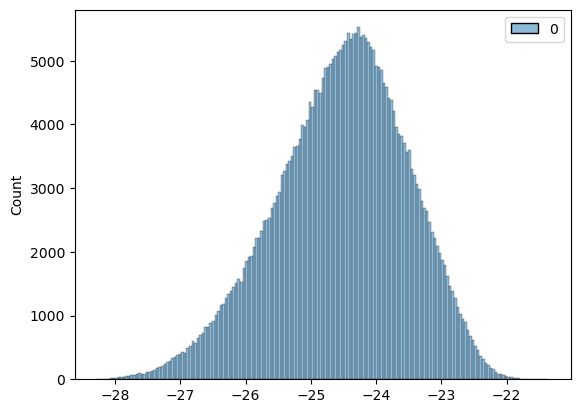

In [10]:
sns.histplot(M_I)

In [ ]:
quasar_all = quasar_SDSS[np.logical_and(quasar_SDSS['Z']<3, quasar_SDSS['Z']>2)]
quasar_cata = np.zeros(len(quasar_all), dtype=[('ra', 'f8'), ('dec', 'f8'), ('z', 'f8'), ('w', 'f8')])
quasar_cata['ra'] = quasar_all['RA']
quasar_cata['dec'] = quasar_all['DEC']
quasar_cata['z'] = quasar_all['Z']
quasar_cata['w'] = 1
np.save('../catalogue/quasar_z>2', quasar_cata)

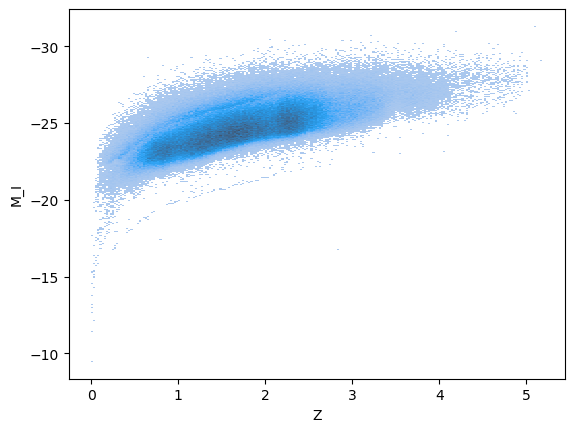

In [17]:
quasar_t = quasar_SDSS[np.logical_and(quasar_SDSS['Z']>0, quasar_SDSS['M_I']<0)]
sns.histplot({'Z': quasar_t['Z'].astype(float), 'M_I': quasar_t['M_I'].astype(float)}, x='Z', y='M_I')
plt.gca().invert_yaxis()

<Axes: ylabel='Count'>

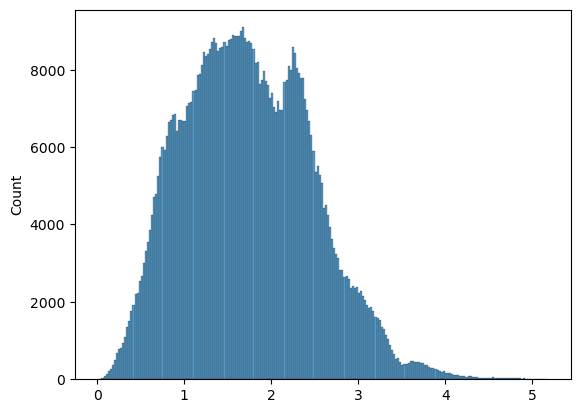

In [18]:
sns.histplot(quasar_t['Z'].astype(float))

In [10]:
quasar_SDSS['PSFMAG'].shape

(750414, 5)

In [12]:
quasar_SDSS['Z'].min()

-999.0

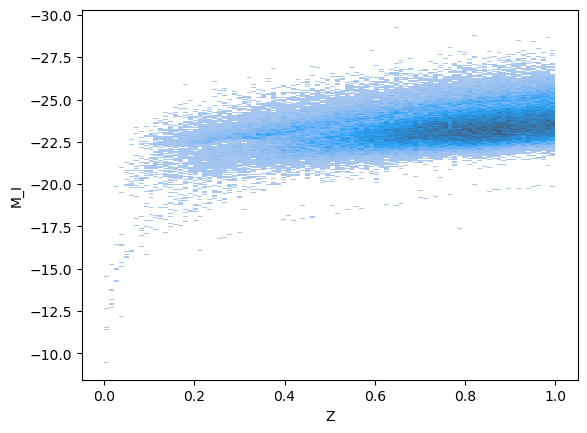

In [13]:
quasar_lowz = quasar_SDSS[np.logical_and(np.logical_and(quasar_SDSS['Z']>0, quasar_SDSS['Z']<1), quasar_SDSS['M_I']<0)]
sns.histplot({'Z': quasar_lowz['Z'].astype(float), 'M_I': quasar_lowz['M_I'].astype(float)}, x='Z', y='M_I')
plt.gca().invert_yaxis()

selection for lowz quasar: z < 1; M_I < -17.5(exclude the outliers)

In [16]:
selection = (quasar_SDSS['Z']>0) & (quasar_SDSS['Z']<1) & (quasar_SDSS['M_I']<-17.5)
quasar_all = quasar_SDSS[selection]
quasar_cata = np.zeros(len(quasar_all), dtype=[('ra', 'f8'), ('dec', 'f8'), ('z', 'f8'), ('w', 'f8')])
quasar_cata['ra'] = quasar_all['RA']
quasar_cata['dec'] = quasar_all['DEC']
quasar_cata['z'] = quasar_all['Z']
quasar_cata['w'] = 1
np.save('../catalogue/quasar_lowz', quasar_cata)

In [17]:
len(quasar_cata)

132531